In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [11]:
IMG_SIZE =224
BATCH_SIZE =32
EPOCHS =10
DATASET_PATH ='D:\intern project\data'

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_2996\1157331203.py:4: SyntaxWarning: invalid escape sequence '\i'
  DATASET_PATH ='D:\intern project\data'


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 6043 images belonging to 2 classes.


In [14]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_2996\3764807294.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))


In [15]:
base_model.trainable = False

In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [17]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
checkpoint = ModelCheckpoint("mask_detector.keras", monitor="val_accuracy", save_best_only=True)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[checkpoint]
)

C:\Users\Jitendra Lahre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\Jitendra Lahre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


 26/188 ━━━━━━━━━━━━━━━━━━━━ 2:25 897ms/step - accuracy: 0.5745 - loss: 0.8063

C:\Users\Jitendra Lahre\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7911 - loss: 0.4341 - val_accuracy: 0.9688 - val_loss: 0.0932
Epoch 2/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:28 474ms/step - accuracy: 0.9375 - loss: 0.1333

C:\Users\Jitendra Lahre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.9375 - loss: 0.1333 - val_accuracy: 0.9714 - val_loss: 0.0872
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 146s 780ms/step - accuracy: 0.9615 - loss: 0.1001 - val_accuracy: 0.9741 - val_loss: 0.0715
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.9787 - val_loss: 0.0634
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 632s 3s/step - accuracy: 0.9773 - loss: 0.0649 - val_accuracy: 0.9807 - val_loss: 0.0590
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9874 - val_loss: 0.0440
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1919s 10s/step - accuracy: 0.9815 - loss: 0.0534 - val_accuracy: 0.9827 - val_loss: 0.0536
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.9688 - loss: 0.0977 - val_accuracy: 0.9801 - val_loss: 0.0617
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 537s 3s/step - accuracy: 0.9812 - loss: 0.0480 - val_ac

In [23]:
model.save("mask_detector_final.keras")

In [24]:
# Print final accuracy
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


Final Training Accuracy: 0.96875
Final Validation Accuracy: 0.9840425252914429


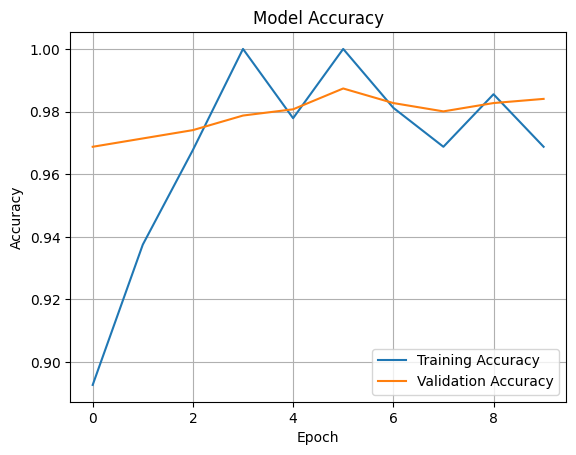

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [30]:
from tensorflow.keras.models import load_model


In [31]:
model = load_model("mask_detector_final.keras")

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [37]:
img = image.load_img("D:\intern project\data\without_mask\without_mask_15.jpg", target_size=(224, 224))  # Replace with actual path
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_2996\1922797485.py:1: SyntaxWarning: invalid escape sequence '\i'
  img = image.load_img("D:\intern project\data\without_mask\without_mask_15.jpg", target_size=(224, 224))  # Replace with actual path


In [38]:
prediction = model.predict(img_array)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [39]:
labels = ["Mask", "No Mask"]
predicted_class = labels[np.argmax(prediction)]
confidence = np.max(prediction) * 100

print(f"Prediction: {predicted_class} ({confidence:.2f}%)")

Prediction: No Mask (63.81%)


In [40]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array


In [41]:
# Load face detector (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [42]:
# Load your trained mask detection model
model = load_model("mask_detector_final.keras")  # or use "mask_detector.h5"


In [43]:
# Class labels
labels = ["Mask", "No Mask"]


In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face region
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0) / 255.0

        # Predict mask or no mask
        prediction = model.predict(face)[0]
        label = labels[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Set bounding box color
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # Display result
        cv2.putText(frame, f"{label} ({confidence:.2f}%)", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    # Show video frame
    cv2.imshow("Live Face Mask Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()